# 마켓과 머신러닝

## 생선 분류 문제

Feature - 머신러닝이나 데이터 분석에 사용되는 개별 독립 변수를 의미. 이는 데이터의 특성을 표현하며, 이러한 특성들은 머신러닝 모델이 패턴을 학습하고, 예측이나 분류를 수행 (여기서는 도미, 빙어의 길이와 무게)

In [72]:
#도미(35마리)
bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]

bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0, 450.0, 500.0,
                475.0, 500.0, 500.0, 340.0, 600.0, 600.0, 700.0, 700.0, 610.0, 650.0,
                575.0, 685.0, 620.0, 680.0, 700.0, 725.0, 720.0, 714.0, 850.0, 1000.0,
                920.0, 955.0, 925.0, 975.0, 950.0]

#빙어(14마리)
smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]

smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2,
                13.4, 12.2, 19.7, 19.9]

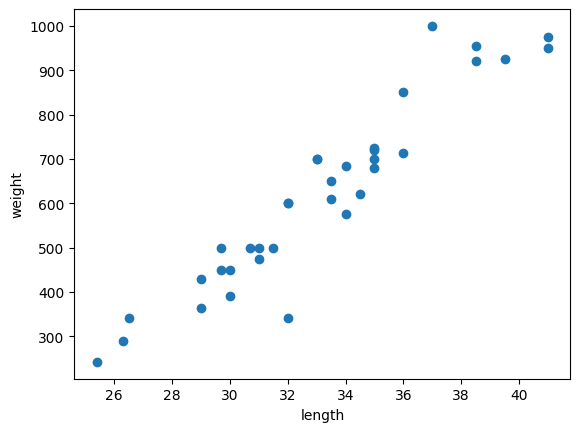

In [73]:
import matplotlib.pyplot as plt
#도미 산점도 그래프
plt.scatter(bream_length, bream_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

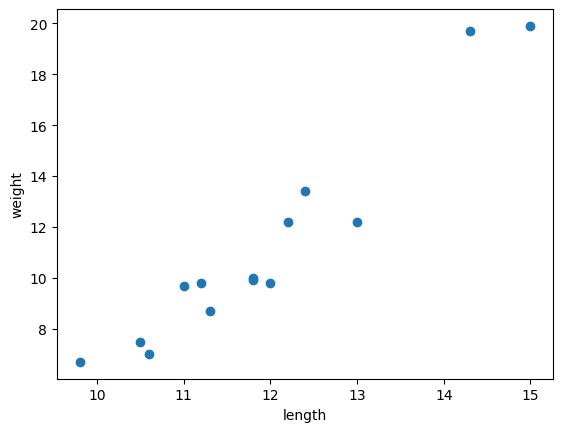

In [74]:
#빙어 산점도 그래프
plt.scatter(smelt_length, smelt_weight)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

### 도미와 빙어 데이터 분석

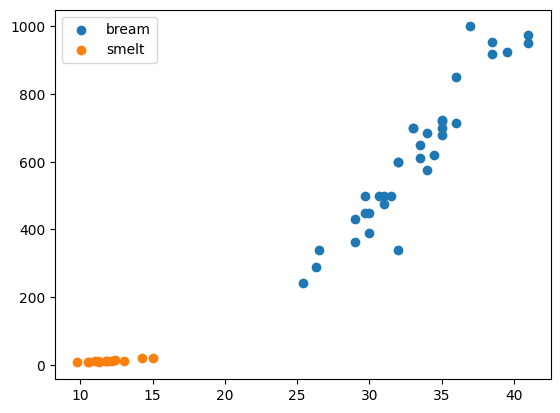

In [75]:
#도미와 빙어 산점도 그래프
plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')
# 범례 표시
plt.legend()

plt.show()

## 첫 번째 머신러닝 프로그램

### 훈련 데이터 생성

In [76]:
# bream, smelt 데이터 병합
length = bream_length + smelt_length
weight = bream_weight + smelt_weight

In [77]:
# 학습 데이터 생성

#파이썬의 리스트 컴프리헨션과 zip() 함수를 이용하여 각 리스트의 요소를 쌍으로 묶어 새로운 리스트를 생성
fish_data = [[l, w] for l, w in zip(length, weight)] 
print(fish_data)

# [추가] 학습용/테스트용 데이터를 분리하는 사이킷런 모듈이 존재 (sklearn. model_selection)
# from sklearn.model_selection import train_test_split
# train_input, test_input, train_target, test_target = train_test_split(fish_data, fish_target, stratify=fish_target, random_state=42)


[[25.4, 242.0], [26.3, 290.0], [26.5, 340.0], [29.0, 363.0], [29.0, 430.0], [29.7, 450.0], [29.7, 500.0], [30.0, 390.0], [30.0, 450.0], [30.7, 500.0], [31.0, 475.0], [31.0, 500.0], [31.5, 500.0], [32.0, 340.0], [32.0, 600.0], [32.0, 600.0], [33.0, 700.0], [33.0, 700.0], [33.5, 610.0], [33.5, 650.0], [34.0, 575.0], [34.0, 685.0], [34.5, 620.0], [35.0, 680.0], [35.0, 700.0], [35.0, 725.0], [35.0, 720.0], [36.0, 714.0], [36.0, 850.0], [37.0, 1000.0], [38.5, 920.0], [38.5, 955.0], [39.5, 925.0], [41.0, 975.0], [41.0, 950.0], [9.8, 6.7], [10.5, 7.5], [10.6, 7.0], [11.0, 9.7], [11.2, 9.8], [11.3, 8.7], [11.8, 10.0], [11.8, 9.9], [12.0, 9.8], [12.2, 12.2], [12.4, 13.4], [13.0, 12.2], [14.3, 19.7], [15.0, 19.9]]


In [78]:
# 정답 데이터 생성
# 이진 분류 문제 (도미는 1, 빙어는 0으로 표현하여 리스트로 저장, 타겟은 총 49마리)
fish_target = [1] * 35 +[0] * 14
print(fish_target)

[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0]


### k-최근접 이웃 알고리즘

In [79]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()
#클래스 인스턴스 생성, 분류할 때 가장 가까운 5개의 이웃을 참조함. (기본 값 5)
#이웃데이터 적으면 과소집합 과 과대집합 

# 모델 학습
#fish_data는 모델이 학습할 특성 데이터, fish_target은 각 데이터 포인트에 대한 레이블 데이터 (1, 0)
#가장 가까운 k개의 이웃을 찾고, 이 이웃들의 클래스를 기반으로 새로운 데이터 포인트의 클래스를 예측
kn.fit(fish_data, fish_target)


KNeighborsClassifier()

In [80]:
# 모델 정확도
kn.score(fish_data, fish_target)

# 가중치를 적용하면, 단순히 이웃의 수를 기반으로 결정하는 대신, 이웃의 거리나 다른 기준에 따라 각 이웃의 영향력을 달리하여 보다 정교한 분류가 가능
# 거리에 따른 가중치를 적용한 KNeighborsClassifier 인스턴스 생성
# kn = KNeighborsClassifier(weights='distance')

1.0

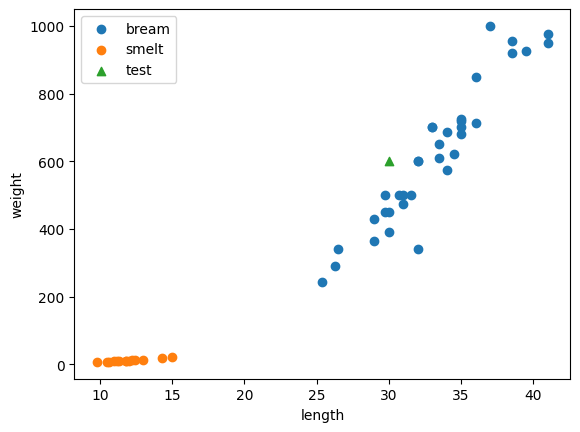

In [81]:
# 테스트 데이터 생성


# bream, smelt 산점도(scatter)
plt.scatter(bream_length, bream_weight, label='bream')
plt.scatter(smelt_length, smelt_weight, label='smelt')

test_length = 30
test_weight = 600
# test_data 산점도(scatter)

plt.scatter(test_length, test_weight, label='test', marker ='^')
plt.xlabel('length')
plt.ylabel('weight')
plt.legend()
plt.show()

In [82]:
# test_data 예측
kn.predict([[30,600]])
# test_data를 예측했을 때 1이 나와 도미라고 분류됨

array([1])

In [83]:
print(kn._fit_X)

[[  25.4  242. ]
 [  26.3  290. ]
 [  26.5  340. ]
 [  29.   363. ]
 [  29.   430. ]
 [  29.7  450. ]
 [  29.7  500. ]
 [  30.   390. ]
 [  30.   450. ]
 [  30.7  500. ]
 [  31.   475. ]
 [  31.   500. ]
 [  31.5  500. ]
 [  32.   340. ]
 [  32.   600. ]
 [  32.   600. ]
 [  33.   700. ]
 [  33.   700. ]
 [  33.5  610. ]
 [  33.5  650. ]
 [  34.   575. ]
 [  34.   685. ]
 [  34.5  620. ]
 [  35.   680. ]
 [  35.   700. ]
 [  35.   725. ]
 [  35.   720. ]
 [  36.   714. ]
 [  36.   850. ]
 [  37.  1000. ]
 [  38.5  920. ]
 [  38.5  955. ]
 [  39.5  925. ]
 [  41.   975. ]
 [  41.   950. ]
 [   9.8    6.7]
 [  10.5    7.5]
 [  10.6    7. ]
 [  11.     9.7]
 [  11.2    9.8]
 [  11.3    8.7]
 [  11.8   10. ]
 [  11.8    9.9]
 [  12.     9.8]
 [  12.2   12.2]
 [  12.4   13.4]
 [  13.    12.2]
 [  14.3   19.7]
 [  15.    19.9]]


In [84]:
print(kn._y)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 0
 0 0 0 0 0 0 0 0 0 0 0 0]


In [99]:
# n_neighbors=49로 설정된 KNeighborsClassifier 생성
kn49 = KNeighborsClassifier(n_neighbors=49)
kn49.fit(fish_data, fish_target)
kn49.score(fish_data, fish_target)
# 전체 49개의 데이터 중에서 35개가 도미라면, 모델이 모든 입력에 대해 도미라고 예측할 것이므로 정확도는 도미의 비율인 35/49가 됨.

0.9795918367346939

In [86]:
# 도미 데이터 / 전체 데이터
print(35 / 49)

0.7142857142857143


### 확인 문제

In [87]:
kn = KNeighborsClassifier()
kn.fit(fish_data, fish_target)

for n in range(5, 50):
    # n_neighbors를 바꿔가며 score 계산
    kn.n_neighbors = n
    score = kn.score(fish_data, fish_target)

    # 처음으로 100% 정확도를 달성하지 못하는 n_neibors 출력
    if score < 1:
        print(f'n_neighbors: {n}\t score: {score}')
        break

n_neighbors: 18	 score: 0.9795918367346939
